# Ausführung: Aggregation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
pd.options.display.max_rows = 4000
pd.options.display.max_colwidth = 1000

In [2]:
tweets = pd.read_pickle("./data/data_mining/tweets_with_rule_and_ml_based_class.pkl")
tweets.shape[0]

40817

In [3]:
prices = pd.read_pickle("./data/crypto/litecoin.pkl")
prices.shape[0]

115

Alle Tweets laden, d.h. auch die, welche zuvor ausgefiltert wurden

In [4]:
all_tweets = pd.read_pickle("./data/data_mining/all_tweets_raw.pkl")
all_tweets.shape[0]

186502

In [5]:
prices['date'] = prices['timestamp'].apply( lambda df : pd.datetime(year=df.year, month=df.month, day=df.day))
tweets['date'] = tweets['created_at'].apply( lambda df : pd.datetime(year=df.year, month=df.month, day=df.day))

## SA Auswertung

In [44]:
# https://medium.com/@andy.lane/convert-pandas-dataframes-to-images-using-imgkit-5da7e5108d55
# Ergänzt mit config parameter!
import random
import os
def DataFrame_to_image(data, outputfile="out.png", fmt="png"):
    '''
    For rendering a Pandas DataFrame as an image.
    data: a pandas DataFrame
    css: a string containing rules for styling the output table. This must 
         contain both the opening an closing <style> tags.
    *outputimage: filename for saving of generated image
    *format: output format, as supported by IMGKit. Default is "png"
    '''
    css = """
    <style type=\"text/css\">
    table {
    color: #333;
    font-family: Helvetica, Arial, sans-serif;
    width: 640px;
    border-collapse:
    collapse; 
    border-spacing: 0;
    }
    td, th {
    border: 1px solid transparent; /* No more visible border */
    height: 30px;
    }
    th {
    background: #DFDFDF; /* Darken header a bit */
    font-weight: bold;
    text-align: center;
    }
    td {
    background: #FAFAFA;
    text-align: center;
    }
    table tr:nth-child(odd) td{
    background-color: white;
    }
    tbody tr {
    border-bottom: 2px solid #afafaf;
    }
    </style>
    """
    fn = str(random.random()*100000000).split(".")[0] + ".html"
    
    try:
        os.remove(fn)
    except:
        None
    text_file = open(fn, "a")
    
    # write the CSS
    text_file.write(css)
    # write the HTML-ized Pandas DataFrame
    text_file.write(data.to_html(index=False))
    text_file.close()
    
    # See IMGKit options for full configuration,
    # e.g. cropping of final image
    imgkitoptions = {
        'format': 'png',
        'crop-w': '655',
        'encoding': "UTF-8"
    }
    config = imgkit.config(wkhtmltoimage='/usr/local/bin/wkhtmltoimage')
    imgkit.from_file(fn, outputfile, options=imgkitoptions, config=config)
    os.remove(fn)

### Top 3 Regelbasiert als Bild abspeichern

In [46]:
tweets_sort_desc_rule = tweets.sort_values(by=['afinn_sentiment'], ascending=False)
tweets_sort_desc_rule = tweets_sort_desc_rule[['full_text', 'afinn_sentiment', 'ml_sentiment']]
tweets_sort_desc_rule.columns = ['Tweet', 'AFINN Score', 'ML Score']
tweets_sort_desc_rule = tweets_sort_desc_rule.iloc[:3]
tweets_sort_desc_rule.reset_index(drop=True, inplace=True)
DataFrame_to_image(tweets_sort_desc_rule, outputfile='./data/img/rule_top_3.png', fmt='png')

Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


### Flop 3 Regelbasiert als Bild abspeichern

In [47]:
tweets_sort_asc_rule = tweets.sort_values(by=['afinn_sentiment'], ascending=True)
tweets_sort_asc_rule = tweets_sort_asc_rule[['full_text', 'afinn_sentiment', 'ml_sentiment']]
tweets_sort_asc_rule.columns = ['Tweet', 'AFINN Score', 'ML Score']
tweets_sort_asc_rule = tweets_sort_asc_rule.iloc[:3]
tweets_sort_asc_rule.reset_index(drop=True, inplace=True)
DataFrame_to_image(tweets_sort_asc_rule, outputfile='./data/img/rule_flop_3.png', fmt='png')

Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


### Top 3 ML-basiert als Bild abspeichern

In [49]:
tweets_sort_desc_ml = tweets.sort_values(by=['ml_sentiment'], ascending=False)
tweets_sort_desc_ml = tweets_sort_desc_ml[['full_text', 'afinn_sentiment', 'ml_sentiment']]
tweets_sort_desc_ml.columns = ['Tweet', 'AFINN Score', 'ML Score']
tweets_sort_desc_ml = tweets_sort_desc_ml.iloc[:3]
tweets_sort_desc_ml.reset_index(drop=True, inplace=True)
DataFrame_to_image(tweets_sort_desc_ml, outputfile='./data/img/ml_top_3.png', fmt='png')

Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


### Flop 3 ML-basiert als Bild abspeichern

In [50]:
tweets_sort_asc_ml = tweets.sort_values(by=['ml_sentiment'], ascending=True)
tweets_sort_asc_ml = tweets_sort_asc_ml[['full_text', 'afinn_sentiment', 'ml_sentiment']]
tweets_sort_asc_ml.columns = ['Tweet', 'AFINN Score', 'ML Score']
tweets_sort_asc_ml = tweets_sort_asc_ml.iloc[:3]
tweets_sort_asc_ml.reset_index(drop=True, inplace=True)
DataFrame_to_image(tweets_sort_asc_ml, outputfile='./data/img/ml_flop_3.png', fmt='png')

Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


In [64]:
sa_same = tweets[tweets['afinn_sentiment_class'] == tweets['ml_sentiment_class']]
sa_differences = tweets[abs(tweets['afinn_sentiment_class'] - tweets['ml_sentiment_class']) == 2]

In [65]:
print("Tweets mit gleicher Klasse: {0}".format(sa_same.shape[0]))
print("Tweets mit gegensätziger Klasse: {0}".format(sa_differences.shape[0]))

Tweets mit gleicher Klasse: 19057
Tweets mit gegensätziger Klasse: 2502


## Top 3 Regelbasiert, welche ML basiert negativ sind

In [60]:
diff_sort_desc_rule = sa_differences[sa_differences['afinn_sentiment_class'] == 1].sort_values(by=['afinn_sentiment'], ascending=False)
diff_sort_desc_rule = diff_sort_desc_rule[['full_text', 'afinn_sentiment', 'ml_sentiment']]
diff_sort_desc_rule.columns = ['Tweet', 'AFINN Score', 'ML Score']
diff_sort_desc_rule = diff_sort_desc_rule.iloc[:3]
diff_sort_desc_rule.reset_index(drop=True, inplace=True)
DataFrame_to_image(diff_sort_desc_rule, outputfile='./data/img/rule_top_3_ml_negativ.png', fmt='png')

Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


In [61]:
# Top 3 ML-basiert, welche Regelbasiert negativ sind

In [63]:
diff_sort_desc_ml = sa_differences[sa_differences['ml_sentiment_class'] == 1].sort_values(by=['ml_sentiment'], ascending=False)
diff_sort_desc_ml = diff_sort_desc_ml[['full_text', 'afinn_sentiment', 'ml_sentiment']]
diff_sort_desc_ml.columns = ['Tweet', 'AFINN Score', 'ML Score']
diff_sort_desc_ml = diff_sort_desc_ml.iloc[:3]
diff_sort_desc_ml.reset_index(drop=True, inplace=True)
diff_sort_desc_ml
DataFrame_to_image(diff_sort_desc_ml, outputfile='./data/img/ml_top_3_rule_negativ.png', fmt='png')

Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


In [36]:
print("Beide Ansätze gleich klassifiziert: {0}".format(sa_same.shape[0]))
print("Ansätze gegensätzig klassifiziert: {0}".format(sa_differences.shape[0]))

Beide Ansätze gleich klassifiziert: 19057
Ansätze gegensätzig klassifiziert: 2502


[rule] Unterschiedlich Klassifizierte Tweets, positiv: 1311
[rule] Unterschiedlich Klassifizierte Tweets, neutral: 0
[rule] Unterschiedlich Klassifizierte Tweets, negativ: 1191


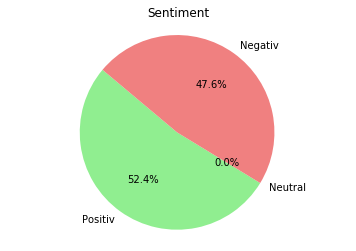

In [37]:
sa_diff_rule_num_positive_tweets = sa_differences[sa_differences['afinn_sentiment_class'] == 1].shape[0]
sa_diff_rule_num_neutral_tweets = sa_differences[sa_differences['afinn_sentiment_class'] == 0].shape[0]
sa_diff_rule_num_negative_tweets = sa_differences[sa_differences['afinn_sentiment_class'] == -1].shape[0]

print("[rule] Unterschiedlich Klassifizierte Tweets, positiv: {0}".format(sa_diff_rule_num_positive_tweets))
print("[rule] Unterschiedlich Klassifizierte Tweets, neutral: {0}".format(sa_diff_rule_num_neutral_tweets))
print("[rule] Unterschiedlich Klassifizierte Tweets, negativ: {0}".format(sa_diff_rule_num_negative_tweets))

colors = ['lightgreen', 'lightgray', 'lightcoral']
labels = 'Positiv', 'Neutral', 'Negativ'

# Plot
plt.pie([sa_diff_rule_num_positive_tweets, sa_diff_rule_num_neutral_tweets, sa_diff_rule_num_negative_tweets], labels=labels, colors=colors,
autopct='%1.1f%%', shadow=False, startangle=140)

plt.title("Sentiment")
plt.axis('equal')
plt.show()

[ml] Unterschiedlich Klassifizierte Tweets, positiv: 1191
[ml] Unterschiedlich Klassifizierte Tweets, neutral: 0
[ml] Unterschiedlich Klassifizierte Tweets, negativ: 1311


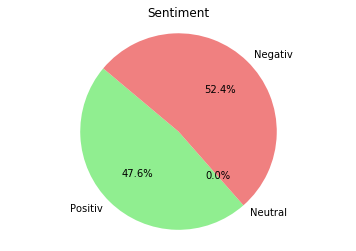

In [38]:
sa_diff_ml_num_positive_tweets = sa_differences[sa_differences['ml_sentiment_class'] == 1].shape[0]
sa_diff_ml_num_neutral_tweets = sa_differences[sa_differences['ml_sentiment_class'] == 0].shape[0]
sa_diff_ml_num_negative_tweets = sa_differences[sa_differences['ml_sentiment_class'] == -1].shape[0]

print("[ml] Unterschiedlich Klassifizierte Tweets, positiv: {0}".format(sa_diff_ml_num_positive_tweets))
print("[ml] Unterschiedlich Klassifizierte Tweets, neutral: {0}".format(sa_diff_ml_num_neutral_tweets))
print("[ml] Unterschiedlich Klassifizierte Tweets, negativ: {0}".format(sa_diff_ml_num_negative_tweets))

colors = ['lightgreen', 'lightgray', 'lightcoral']
labels = 'Positiv', 'Neutral', 'Negativ'

# Plot
plt.pie([sa_diff_ml_num_positive_tweets, sa_diff_ml_num_neutral_tweets, sa_diff_ml_num_negative_tweets], labels=labels, colors=colors,
autopct='%1.1f%%', shadow=False, startangle=140)

plt.title("Sentiment")
plt.axis('equal')
plt.show()

In [31]:
sa_differences.loc[[1288 , 1622, 2191, 39760, 39855, 40288, 37021], ['full_text', 'afinn_sentiment_class', 'ml_sentiment_class'] ]

full_text  \
1288                                                                                                    Litecoin Price Analysis: LTC/USD has room for fast move back to $50 - https://t.co/WmaZRXoSXv https://t.co/IPNTe2tLqw   
1622        *engage best movie trailer voice* When the #crypto market is in turmoil, when #hodlers lose hope, only one coin can show a positive movement.....Litecoin Cash\n\n😆\n\n#Litecoin #Bitcoin https://t.co/Y5bTsnF4fI   
2191                                                                                                                                                                          Buy litecoin god dammit https://t.co/bqrGZkoqzi   
39760  “Awww it’s rainy, I’m tired, I think I just want to curl up in bed and do nothing all day” \n-Said #Litecoin NEVER!\n7+ years, zero downtime 😁\n\n#Litecoin365\n#PayWithLitecoin\n#Bitcoin\n#Crypto\n#Happy\n#Thursday   
39855                                                                                                                                                                                  Coinbase wallet now supports #Litecoin   
40288                                                                                                                  See ya! 👋😃\n\nLitecoin broke her 200 DMA on Monday and hasn't been back since. https://t.co/rYdaXotzUX   
37021                                        $LTC #LTC\n\nLitecoin leading again.\nI believe we'll test local high confluent with the Fib extension.\nNote the RSI still has room to fuel the rocket. https://t.co/pb8vvzQ5Iu   

       afinn_sentiment_class  ml_sentiment_class  
1288                     1.0                -1.0  
1622                     1.0                -1.0  
2191                     1.0                -1.0  
39760                    1.0                -1.0  
39855                    1.0                -1.0  
40288                    1.0                -1.0  
37021                    1.0                -1.0

In [40]:
sa_differences[sa_differences['ml_sentiment_class'] == -1].head(150)

full_text  \
89                                                                                                                                     @macsg1series @macgyveronline @StargateDaily @Gone_fishing_ES @TheMRSHyacinth @CandCGeekcast @___ForThePeople @officialssol @Litecoin_MAD @GateWorld @ImaginWorldsPod @PhantomGlitchPo @Talking_Tauri @sgatlantcast @albertburdge @PuddingtownDuck @WYWComedy @GJTYpodcast Get well soon :*   
153                                                                                                                                                                                                                                                                                                                            Litecoin Price Analysis: LTC/USD Slow Down as Bears Prevent Gains above $60 https://t.co/F6dLi6lCQo   
228                                                                                                                                                        In the past 3 hours, \nthe top 50 $LTC wallets have sent 43,145.53\nmore Litecoin than they have received\n\nAt $49 USD, \nthat's $2.1 Million USD\n\n2018 Nov 11\nToday, LTC price is down −4.39%\n\nPrice manipulations? \n\n@LTCWhaleWatcher https://t.co/p2UhIg6kmX   
231                                                                                                                                                                                                                               The price of Veritaseum is $34.72! https://t.co/BKD1ZIvdHg #stocks #bond #gold #silver #bitcoin #ethereum #litecoin #theta #digi #crypto #eu #uk #australia #brazil #japan#korea #mexico #canada   
232                                                                                                                                                                                                                                                                                                 @MrHodl @PeterLBrandt @xtdisnkfe @COLDCARDwallet Even @COLDCARDwallet has Litcoin support built in. Litecoin isn't going away.   
265                                                                                                                                                                                                                                                                            @LitecoinPope @bensemchee @LandM_Marius 😂 @ asking @LandM_Marius 🤣😂😅🤣😂 what a joke.. I would rather just Ben opinion..   \n\nomg Marius 😂🤣 SMH 🤦‍♂️   
329                                                                                                                                                  My least favorite thread lately..\n\nXRP holding strong since last update.\nCardano with some gains.\nETH/TRON no new lows.\n\nLitecoin, EOS, Bitcoin Cash and Bitcoin make new lows.\n\nBitcoin Cash and Litecoin being the worst performers.\n\n🤔🤔🤔 https://t.co/AVaBCmIFSm   
392                                                                                                                  Man Coin @MATRIXAINetwork for listing Felixo to 12 Nov. 16:00. \n\n#felixoexchange #felixoacademy #icomarket #bitcoin #ethereum #ripple #bitcoincash #litecoin #trx #man #pavo #modl #usd #try #blockchain #ico #exchange #cryptocurrency #trader #forex #investing #finance #economy https://t.co/0ruSByDiJ3   
405                                                                                                                                                                                                                         @Litecoin_Friend Long term here as well. I do need to sell some cause I got something I want to spend money on... but I can still wait a month or three. Let's hope #LTC will treat me well by then. 😁   
444                                                                                                                                                                                          

## Aggregation der Tweets pro Tag

In [9]:
def aggregate_tweets_per_day(tweets, all_tweets):
    tweets_per_day = pd.DataFrame({}, columns = [
        'date', 'total_tweets', 
        'rule_positive', 'rule_neutral', 'rule_negative', 'rule_sum', 
        'ml_positive', 'ml_neutral', 'ml_negative', 'ml_sum',
        'ml_rule_positive', 'ml_rule_neutral', 'ml_rule_negative'
    ])
    
    grouped_all_tweets = all_tweets.groupby('date')
    
    i = 0
    for (date, group) in tweets.groupby('date'):
        total_tweets = len(grouped_all_tweets.groups[date.date()])
        i += 1
        
        rule_positive = len(group[group['afinn_sentiment_class'] == 1])
        rule_neutral = len(group[group['afinn_sentiment_class'] == 0])
        rule_negative = len(group[group['afinn_sentiment_class'] == -1])
        rule_sum = group['afinn_sentiment'].sum()
        
        ml_positive = len(group[group['ml_sentiment_class'] == 1])
        ml_neutral = len(group[group['ml_sentiment_class'] == 0])
        ml_negative = len(group[group['ml_sentiment_class'] == -1])
        ml_sum = group['ml_sentiment'].sum()
        
        ml_rule_positive = len(group[(group['afinn_sentiment_class'] == 1) & (group['ml_sentiment_class'] == 1)])
        ml_rule_neutral = len(group[(group['afinn_sentiment_class'] == 0) & (group['ml_sentiment_class'] == 0)])
        ml_rule_negative = len(group[(group['afinn_sentiment_class'] == -1) & (group['ml_sentiment_class'] == -1)])
        
        row = pd.Series({
            'date':date,
            'total_tweets':total_tweets,
            'rule_positive':rule_positive,
            'rule_neutral':rule_neutral,
            'rule_negative':rule_negative,
            'rule_sum':rule_sum,
            'ml_positive':ml_positive,
            'ml_neutral':ml_neutral,
            'ml_negative':ml_negative,
            'ml_sum':ml_sum,
            'ml_rule_positive':ml_rule_positive,
            'ml_rule_neutral':ml_rule_neutral,
            'ml_rule_negative':ml_rule_negative,
        })
        
        tweets_per_day = tweets_per_day.append(row,ignore_index=True)
        
    tweets_per_day['date'] = pd.to_datetime(tweets_per_day['date'])
    tweets_per_day['date'] = tweets_per_day['date'].apply( lambda df : pd.datetime(year=df.year, month=df.month, day=df.day))
    
    return tweets_per_day

In [10]:
aggregated_data = aggregate_tweets_per_day(tweets, all_tweets)

In [11]:
aggregated_data.head()

date total_tweets rule_positive rule_neutral rule_negative  rule_sum  \
0 2018-11-10          482            51           53            19     109.0   
1 2018-11-11         1056           103           85            24     278.0   
2 2018-11-12         1266           103           89            50     143.0   
3 2018-11-13         1301           112           99            48     229.0   
4 2018-11-14         1139            84          107            46     191.0   

  ml_positive ml_neutral ml_negative      ml_sum ml_rule_positive  \
0          65         54           4   85.245996               34   
1          89        100          23  135.844688               52   
2         115        107          20  160.091927               62   
3         104        124          31  164.532198               59   
4         113         99          25  154.238878               55   

  ml_rule_neutral ml_rule_negative  
0              24                1  
1              39                7  
2              40                4  
3              45               11  
4              50               14

## Merge Kryptodaten

In [12]:
result = pd.merge(prices, aggregated_data, on='date')
result.shape[0]

102

In [13]:
result.set_index('date', inplace=True)
result.drop('timestamp', axis=1, inplace=True)
result.drop('time', axis=1, inplace=True)

In [14]:
result['total_tweets'] = pd.to_numeric(result['total_tweets'])
result['rule_positive'] = pd.to_numeric(result['rule_positive'])
result['rule_neutral'] = pd.to_numeric(result['rule_neutral'])
result['rule_negative'] = pd.to_numeric(result['rule_negative'])
result['ml_positive'] = pd.to_numeric(result['ml_positive'])
result['ml_neutral'] = pd.to_numeric(result['ml_neutral'])
result['ml_negative'] = pd.to_numeric(result['ml_negative'])
result['ml_rule_positive'] = pd.to_numeric(result['ml_rule_positive'])
result['ml_rule_neutral'] = pd.to_numeric(result['ml_rule_neutral'])
result['ml_rule_negative'] = pd.to_numeric(result['ml_rule_negative'])

In [15]:
result.head(1)

close   high    low   open  volumefrom    volumeto  total_tweets  \
date                                                                           
2018-11-10  52.18  52.55  51.67  51.89    63220.37  3298761.03           482   

            rule_positive  rule_neutral  rule_negative  rule_sum  ml_positive  \
date                                                                            
2018-11-10             51            53             19     109.0           65   

            ml_neutral  ml_negative     ml_sum  ml_rule_positive  \
date                                                               
2018-11-10          54            4  85.245996                34   

            ml_rule_neutral  ml_rule_negative  
date                                           
2018-11-10               24                 1

In [16]:
result.dtypes

close               float64
high                float64
low                 float64
open                float64
volumefrom          float64
volumeto            float64
total_tweets          int64
rule_positive         int64
rule_neutral          int64
rule_negative         int64
rule_sum            float64
ml_positive           int64
ml_neutral            int64
ml_negative           int64
ml_sum              float64
ml_rule_positive      int64
ml_rule_neutral       int64
ml_rule_negative      int64
dtype: object

In [17]:
result.to_pickle("./data/data.pkl")